# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

/Users/dramnath/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
admissions = pd.read_csv("/Users/dramnath/Downloads/CHI-DS-6-master/Unit Projects/Project_2/assets/admissions.csv")
admissions.head()


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
admissions.count()
admissions.shape 

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [5]:
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE values are spread out over a wider range than GPA

#### Question 4. Drop data points with missing data


In [6]:
admissions = admissions.dropna()

In [16]:
dir(admissions)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__

In [7]:
admissions.dropna().isnull().apply(sum, axis = 0)

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Ran the function of admissions.dropna().isnull().apply(sum, axis = 0)

#### Question 6. Create box plots for GRE and GPA

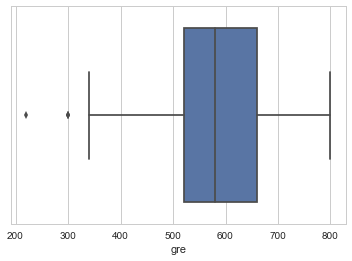

In [8]:
#boxplot GRE
sns.set_style("whitegrid")
ax = sns.boxplot(x=admissions["gre"])


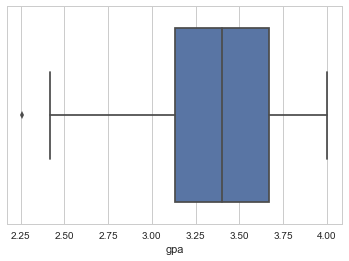

In [9]:
#boxplot GPA
sns.set_style("whitegrid")
ax = sns.boxplot(x=admissions["gpa"])

#### Question 7. What do this plots show?

Answer: There are outliers for GRE and GPA. Boxplots find minimum, first quartile, median, third quartile, and maximum. 

#### Question 8. Describe each distribution 

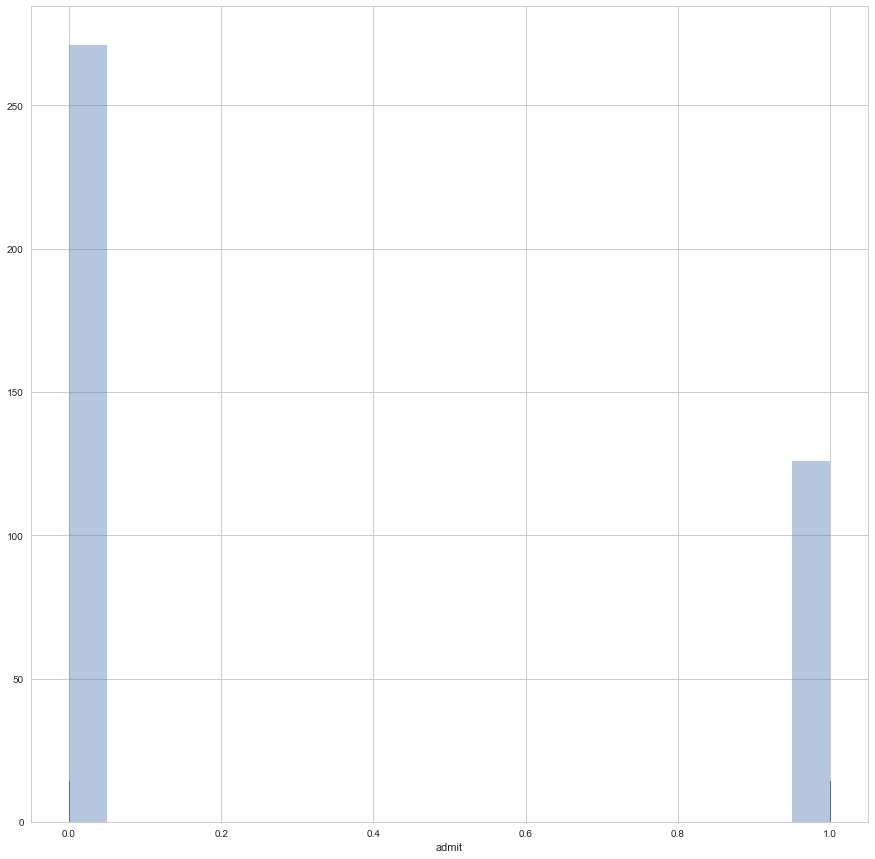

In [31]:
# plot the distribution of each variable 
sns.distplot(admissions['admit'], bins=20, kde=False, rug=True)


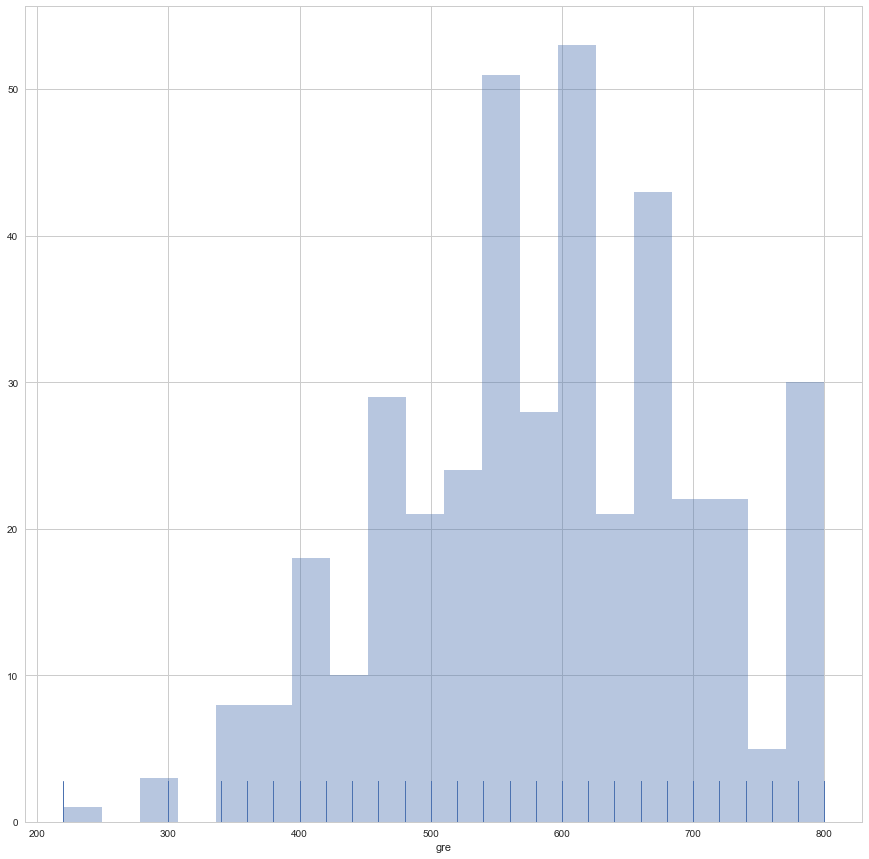

In [32]:
sns.distplot(admissions['gre'], bins=20, kde=False, rug=True)


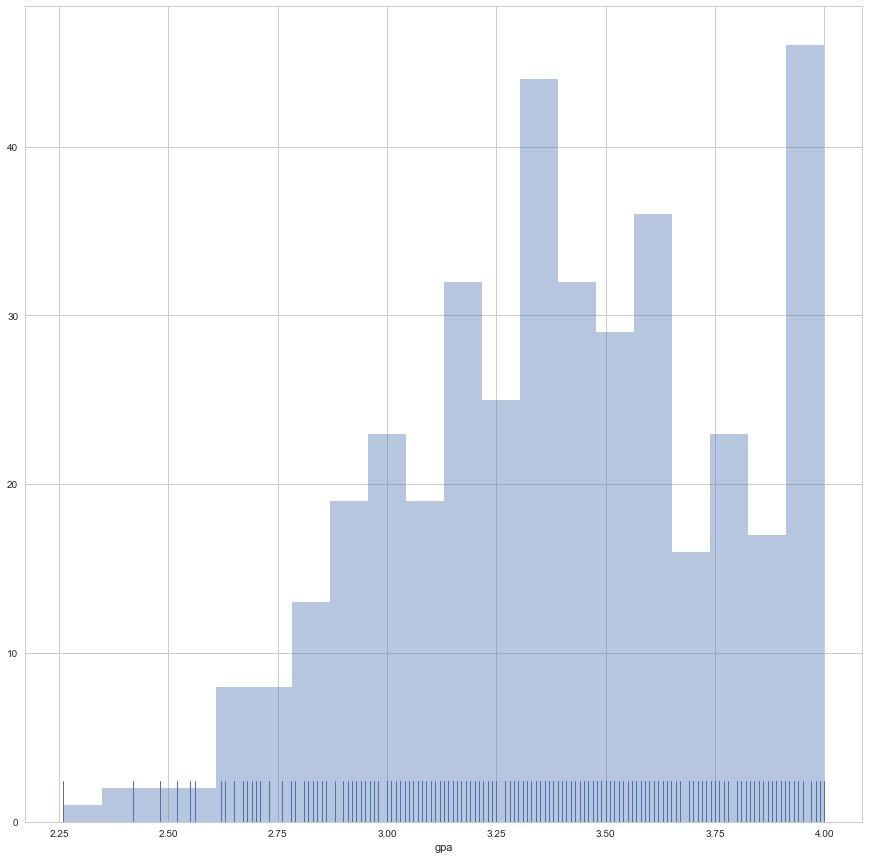

In [33]:
sns.distplot(admissions['gpa'], bins=20, kde=False, rug=True)


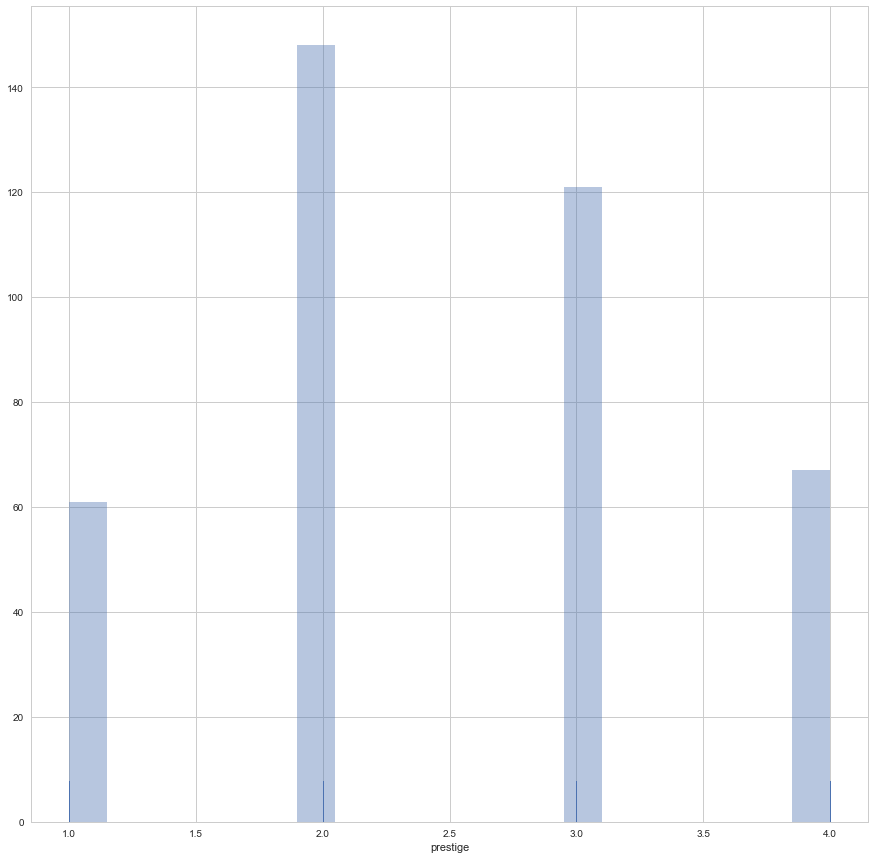

In [34]:
sns.distplot(admissions['prestige'], bins=20, kde=False, rug=True)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, none of the data is normally distrubuted. GPA and GRE skew right, admit is binary and prestige should be adjusted. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No, the distribution does not need a correction. Prestige should have dummy variables created. 

#### Question 11. Which of our variables are potentially colinear? 

In [27]:
admissions.corr()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
admit,1.000000,0.181202,0.174116,-0.243563,0.204689,0.067459,-0.122302,-0.133859
gre,0.181202,1.000000,0.382408,-0.124533,0.088277,0.058454,-0.074380,-0.069046
gpa,0.174116,0.382408,1.000000,-0.060976,0.068304,-0.050507,0.070881,-0.087671
prestige,-0.243563,-0.124533,-0.060976,1.000000,-0.670582,-0.398292,0.357934,0.719947
prestige_1.0,0.204689,0.088277,0.068304,-0.670582,1.000000,-0.328493,-0.282120,-0.191989
prestige_2.0,0.067459,0.058454,-0.050507,-0.398292,-0.328493,1.000000,-0.510469,-0.347385
prestige_3.0,-0.122302,-0.074380,0.070881,0.357934,-0.282120,-0.510469,1.000000,-0.298345
prestige_4.0,-0.133859,-0.069046,-0.087671,0.719947,-0.191989,-0.347385,-0.298345,1.000000


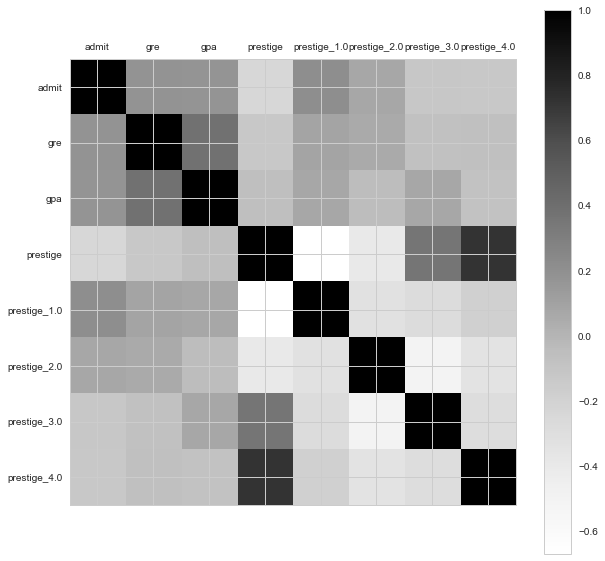

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 6


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(admissions.corr())
fig.colorbar(cax)
ax.set_xticks(range(len(admissions.corr().index)))
ax.set_yticks(range(len(admissions.corr().index)))
ax.set_xticklabels(admissions.corr().index)
ax.set_yticklabels(admissions.corr().index)

plt.show()

#### Question 12. What did you find?

Answer: There is collinearity GPA and GRE

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: See below

In [14]:
#Create dummy variables for prestige 
admissions = admissions.join(pd.get_dummies(admissions['prestige'],prefix="prestige"))

In [15]:
#Enter the predictors into the model that tries to predict admission rates
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(C = 1000000)
predictors=['gre', 'gpa', "prestige_1.0", "prestige_2.0", "prestige_3.0", 'prestige_4.0']
lm = LogisticRegression()
lm.fit(admissions[predictors], admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#View the coefficients for each predictor
mycoefs = pd.DataFrame(np.array(lm.coef_)).T.copy()
mycoefs.index = predictors
mycoefs

,0
gre,0.001727
gpa,0.195964
prestige_1.0,0.359435
prestige_2.0,-0.319295
prestige_3.0,-0.888215
prestige_4.0,-1.104591


In [17]:
#convert into odds from log odds
import numpy as np

mycoefs2 = pd.DataFrame(np.array(np.exp(lm.coef_))).T.copy()
mycoefs2.index = predictors
mycoefs2

,0
gre,1.001728
gpa,1.216484
prestige_1.0,1.432519
prestige_2.0,0.726661
prestige_3.0,0.411389
prestige_4.0,0.331346


In [19]:
#Evaluate the accuracy of the model by using the score function
feature_set = admissions[predictors]
print(lm.score(feature_set, admissions['admit']))

0.712846347607


#### Question 14. What is your hypothesis? 

Answer: The odds of being admitted multiply by 1.432519 for every prestige value = 1 holding that all other variables are constant. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

(1) Fill with 0 - admissions.fillna(0)
(2) Fill with mean value - admissions.fillna(dataset.mean(), inplace=True)
(3) Forward-fill to propagate the previous value forward - admissions.fillna(method='ffill')
(4) Back-fill to propagate the next values backward - admissions.fillna(method='bfill')